In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import pandas as pd

### get ERA daily OLR data, do the W-K filter

In [3]:
folr=xr.open_dataset('/Users/dongxiay/Documents/data/ERA5_OLR_1959-2014_1deg.nc')
ds=folr['mtnlwrf'][:,::-1,:]
ds = ds.roll(longitude=(ds.sizes['longitude'] // 2), roll_coords=True)
ds['longitude'] = (ds.longitude + 360) % 360
ds

<xarray.DataArray 'mtnlwrf' (time: 20454, latitude: 180, longitude: 360)>
array([[[-184.35526, -184.3436 , -184.33194, ..., -184.39502,
         -184.38168, -184.36795],
        [-185.4327 , -185.35153, -185.2696 , ..., -185.57175,
         -185.5293 , -185.48859],
        [-186.70132, -186.6162 , -186.52344, ..., -186.75337,
         -186.74377, -186.73816],
        ...,
        [-164.37943, -164.48962, -164.59395, ..., -164.12749,
         -164.203  , -164.28258],
        [-162.88713, -162.94424, -163.0011 , ..., -162.76637,
         -162.80457, -162.8422 ],
        [-161.64981, -161.67311, -161.69592, ..., -161.62355,
         -161.63036, -161.63669]],

       [[-183.96054, -183.96663, -183.97275, ..., -183.94055,
         -183.94748, -183.9546 ],
        [-184.57863, -184.54836, -184.5185 , ..., -184.64864,
         -184.62585, -184.60352],
        [-185.5214 , -185.48392, -185.44249, ..., -185.62253,
         -185.58969, -185.55855],
...
        [-166.70398, -166.72891, -166.75702, ..., -166.65353,
         -166.66475, -166.68053],
        [-167.5576 , -167.61345, -167.67007, ..., -167.48189,
         -167.5023 , -167.52324],
        [-167.28314, -167.30057, -167.31778, ..., -167.23622,
         -167.2513 , -167.2663 ]],

       [[-184.17569, -184.1744 , -184.17305, ..., -184.20683,
         -184.19539, -184.18352],
        [-185.00879, -184.96376, -184.9182 , ..., -185.15582,
         -185.10658, -185.05669],
        [-185.91895, -185.86353, -185.80383, ..., -186.11256,
         -186.04486, -185.98003],
        ...,
        [-170.8919 , -171.15666, -171.41292, ..., -170.0387 ,
         -170.31155, -170.60474],
        [-170.80742, -170.88971, -170.97252, ..., -170.60506,
         -170.67029, -170.73575],
        [-170.6529 , -170.66876, -170.68517, ..., -170.61923,
         -170.62961, -170.6405 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.375 1.375 2.375 3.375 ... 357.4 358.4 359.4
  * latitude   (latitude) float32 -89.38 -88.38 -87.38 ... 87.62 88.62 89.62
  * time       (time) datetime64[ns] 1959-01-01 1959-01-02 ... 2014-12-31
Attributes:
    units:      W m**-2
    long_name:  Mean top net long-wave radiation flux

#### seasonal anomaly

In [5]:
%%time 
sea_mean=ds.loc[:,-24:20,:].groupby('time.season').mean('time')
sea_ano=ds.loc[:,-24:20,:].groupby('time.season')-sea_mean

CPU times: user 2.8 s, sys: 2.01 s, total: 4.81 s
Wall time: 4.84 s


In [20]:
latitude=sea_ano['latitude']
longitude=sea_ano['longitude']
time=sea_ano['time']

#### install w-k filter package and filter the OLR

In [ ]:
#where to download
#how to install
#how to use 

In [6]:
#WK filtered OLR
import wheeler_kiladis_mjo_filter
import mjoindices.olr_handling as OLRpre

In [ ]:
%%time 
sea_ano_orl = olr.OLRData(np.nan_to_num(sea_ano.to_numpy()),
                          sea_ano['time'].to_numpy(),
                          sea_ano['latitude'].to_numpy(),
                          sea_ano['longitude'].to_numpy())
aa=wheeler_kiladis_mjo_filter.filter_olr_temporally_and_longitudinally(sea_ano_orl, 30., 96., 0., 2160, do_plot=False)

In [11]:
flt_olr = xr.DataArray(aa._olr, 
coords={'time': time,'latitude': latitude,'longitude': longitude}, 
dims=["time", "latitude","longitude"])

flt_olr.to_netcdf('WKfiltered_MJOOLR_3096d_1-4wave_1959-2014.nc')

In [8]:
folr=xr.open_dataset('/Users/dongxiay/Documents/MJO/WKfiltered_MJOOLR_3096d_1-4wave_1959-2014.nc')
flt_olr=folr['__xarray_dataarray_variable__']
flt_olr=flt_olr.rename('olr_mk')
flt_olr

<xarray.DataArray 'olr_mk' (time: 20454, latitude: 44, longitude: 360)>
[323991360 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1959-01-01 1959-01-02 ... 2014-12-31
  * latitude   (latitude) float32 -23.38 -22.38 -21.38 ... 17.62 18.62 19.62
  * longitude  (longitude) float32 0.375 1.375 2.375 3.375 ... 357.4 358.4 359.4

In [ ]:
flt_olr[]

#### the following day-0 is from script 'preprocess_Figure4_eventselection_1950-2014'

In [25]:
from pandas import Timestamp
lanina_mjos=[
#  Timestamp('1950-01-29 00:00:00'),
#  Timestamp('1951-01-16 00:00:00'),
#  Timestamp('1954-11-24 00:00:00'),
#  Timestamp('1955-04-30 00:00:00'),
#  Timestamp('1955-08-22 00:00:00'),
 Timestamp('1959-10-14 00:00:00'),
 Timestamp('1962-11-20 00:00:00'),
 Timestamp('1967-05-08 00:00:00'),
 Timestamp('1968-03-02 00:00:00'),
 Timestamp('1970-09-10 00:00:00'),
 Timestamp('1973-06-24 00:00:00'),
 Timestamp('1974-03-24 00:00:00'),
 Timestamp('1974-12-26 00:00:00'),
 Timestamp('1975-12-24 00:00:00'),
 Timestamp('1978-04-15 00:00:00'),
 Timestamp('1981-07-02 00:00:00'),
 Timestamp('1985-01-22 00:00:00'),
 Timestamp('1985-05-11 00:00:00'),
 Timestamp('1985-09-12 00:00:00'),
 Timestamp('1985-11-28 00:00:00'),
 Timestamp('1988-05-03 00:00:00'),
 Timestamp('2000-12-29 00:00:00'),
 Timestamp('2006-01-02 00:00:00'),
 Timestamp('2007-12-14 00:00:00'),
 Timestamp('2009-01-19 00:00:00'),
 Timestamp('2011-03-11 00:00:00'),
 Timestamp('2012-02-11 00:00:00')]

elnino_mjos=[
 #Timestamp('1957-10-18 00:00:00'),
 #Timestamp('1957-11-27 00:00:00'),
 Timestamp('1963-11-23 00:00:00'),
 Timestamp('1966-03-06 00:00:00'),
 Timestamp('1973-01-02 00:00:00'),
 Timestamp('1976-10-29 00:00:00'),
 Timestamp('1978-01-06 00:00:00'),
 Timestamp('1986-10-19 00:00:00'),
 Timestamp('1987-09-28 00:00:00'),
 Timestamp('1987-12-01 00:00:00'),
 Timestamp('1995-01-03 00:00:00'),
 Timestamp('1995-02-16 00:00:00'),
 Timestamp('1997-12-11 00:00:00'),
 Timestamp('2002-05-31 00:00:00'),
 Timestamp('2002-10-29 00:00:00'),
 Timestamp('2009-10-30 00:00:00'),
 Timestamp('2010-03-12 00:00:00')]

In [14]:
# define the colormap
cmap = plt.get_cmap('bwr')
cmaplist = [cmap(i) for i in range(cmap.N)]
x=8
n=int(cmap.N/2/x)
new_list = cmaplist[1::n]
new_list2 = new_list[:x-1] + [(1,1,1,1),(1,1,1,1)] + new_list[x:]
# create the new map
cmap2 = cmap.from_list('Custom cmap', new_list2, n*2+2)
# new_list  

### Plot W-K flitered OLR for selected MJO events during La Niña conditions

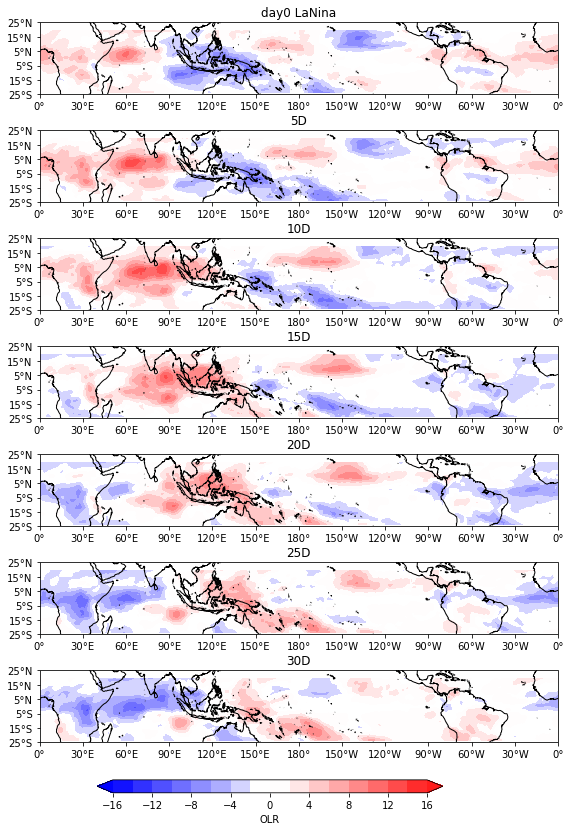

In [28]:
day0=[]
dp5=[]
dp10=[]
dp15=[]
dp20=[]
dp25=[]
dp30=[]
for i in lanina_mjos:
    day0.append(np.datetime64(i))
    dp5.append(np.datetime64(i) + np.timedelta64(5,'D'))
    dp10.append(np.datetime64(i) + np.timedelta64(10,'D'))
    dp15.append(np.datetime64(i) + np.timedelta64(15,'D'))
    dp20.append(np.datetime64(i) + np.timedelta64(20,'D'))
    dp25.append(np.datetime64(i) + np.timedelta64(25,'D'))
    dp30.append(np.datetime64(i) + np.timedelta64(30,'D'))    
    
    
    
laninas=[day0,dp5,dp10,dp15,dp20,dp25,dp30]



mjo2_8_lanina=flt_olr[1,:,:].expand_dims(dim={"day": 7}).copy()
for i in range(7):
    mjo2_8_lanina[i,:,:]=flt_olr.loc[laninas[i],:,:].mean('time')
    
    
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (-180,179.5,-25,25)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

title=['day0 LaNina','day0 LaNina','5D','5D','10D','10D','15D','15D','20D','20D','25D','25D','30D','30D']
   
fig = plt.figure(figsize=(16,6))

proj = ccrs.PlateCarree(central_longitude=180)

for i in range(7):
    for j in range(1):
        ax = fig.add_axes([0.1+j*0.5, 1.7-i*0.25, 0.45, 0.2],projection = proj)
        ax.set_extent(img_extent, crs=proj)
        ax.add_feature(cfeature.COASTLINE) 
        ax.set_xticks(np.arange(leftlon,rightlon+30,30), crs=ccrs.PlateCarree(central_longitude=180))
        ax.set_yticks(np.arange(lowerlat,upperlat+10,10), crs=ccrs.PlateCarree(central_longitude=180))
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.title.set_text(title[i*2+j])
        c = ax.contourf(longitude,latitude,mjo2_8_lanina[i,:,:],
                        levels=np.arange(-16,18,2),
                        extend='both' ,
                        cmap=cmap2,
                        transform=ccrs.PlateCarree()) 
        
#colorbar, You would want to make sure the colorbar always sits in the same axes. 
# To this end, you may create a colorbar axes (cax) outside the loop
fig.colorbar(c, cax=fig.add_axes([0.15, 0.1, 0.3, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR', 
#              ticks=np.arange(0.1,2.1,0.1),
             shrink=0.7)
    

### Plot W-K flitered OLR for selected MJO events during El Niño conditions¶

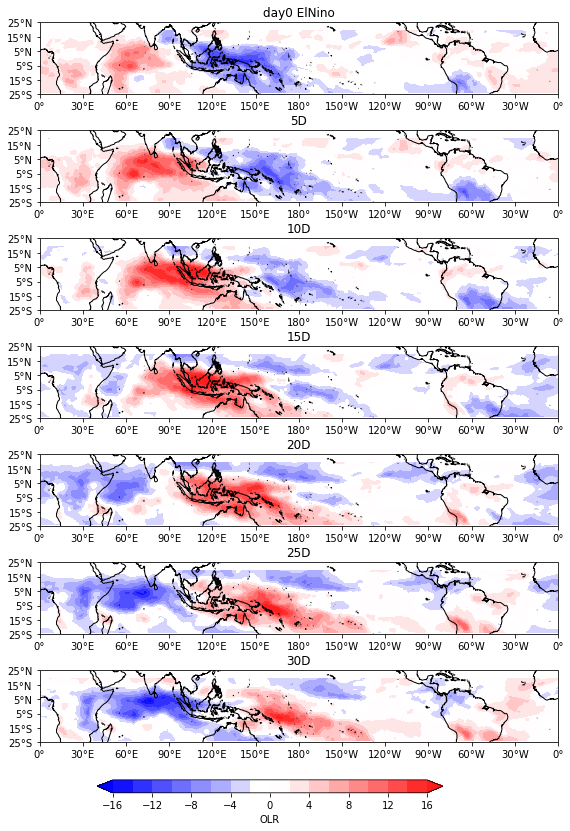

In [29]:
day0=[]
dp5=[]
dp10=[]
dp15=[]
dp20=[]
dp25=[]
dp30=[]
for i in elnino_mjos:
    day0.append(np.datetime64(i))
    dp5.append(np.datetime64(i) + np.timedelta64(5,'D'))
    dp10.append(np.datetime64(i) + np.timedelta64(10,'D'))
    dp15.append(np.datetime64(i) + np.timedelta64(15,'D'))
    dp20.append(np.datetime64(i) + np.timedelta64(20,'D'))
    dp25.append(np.datetime64(i) + np.timedelta64(25,'D'))
    dp30.append(np.datetime64(i) + np.timedelta64(30,'D'))    
    
    
    
elninos=[day0,dp5,dp10,dp15,dp20,dp25,dp30]



mjo2_8_elnino=flt_olr[1,:,:].expand_dims(dim={"day": 7}).copy()
for i in range(7):
    mjo2_8_elnino[i,:,:]=flt_olr.loc[elninos[i],:,:].mean('time')

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (-180,179.5,-25,25)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

title=['day0 ElNino','day0 ElNino','5D','5D','10D','10D','15D','15D','20D','20D','25D','25D','30D','30D']
   
fig = plt.figure(figsize=(16,6))

proj = ccrs.PlateCarree(central_longitude=180)

for i in range(7):
    for j in range(1):
        ax = fig.add_axes([0.1+j*0.5, 1.7-i*0.25, 0.45, 0.2],projection = proj)
        ax.set_extent(img_extent, crs=proj)
        ax.add_feature(cfeature.COASTLINE) 
        ax.set_xticks(np.arange(leftlon,rightlon+30,30), crs=ccrs.PlateCarree(central_longitude=180))
        ax.set_yticks(np.arange(lowerlat,upperlat+10,10), crs=ccrs.PlateCarree(central_longitude=180))
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.title.set_text(title[i*2+j])
        c = ax.contourf(longitude,latitude,mjo2_8_elnino[i,:,:],
                        levels=np.arange(-16,18,2),
                        extend='both' ,
                        cmap=cmap2,
                        transform=ccrs.PlateCarree()) 
        
#colorbar, You would want to make sure the colorbar always sits in the same axes. 
# To this end, you may create a colorbar axes (cax) outside the loop
fig.colorbar(c, cax=fig.add_axes([0.15, 0.1, 0.3, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR', 
#              ticks=np.arange(0.1,2.1,0.1),
             shrink=0.7)
    